In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
churn_df = pd.read_csv("Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_df = churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
X = churn_df.drop(['Exited'], axis=1)
y = churn_df['Exited']

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
numerical = X.drop(['Geography', 'Gender'], axis = 1)
numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [9]:
categorical = X.filter(['Geography', 'Gender'])
categorical.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [10]:
cat_numerical = pd.get_dummies(categorical, drop_first=True)
cat_numerical.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [11]:
X = pd.concat([numerical, cat_numerical], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
from sklearn.model_selection import train_test_split
# Test size is the fraction of test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
classifier = log_clf.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1526   69]
 [ 309   96]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

classifier = rf_clf.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1521   74]
 [ 196  209]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000

0.865


In [17]:
# training SVM algorithm
from sklearn import svm
svm_clf = svm.SVC()

classifier = svm_clf.fit(X_train, y_train)
# making predictions on test set
y_pred = classifier.predict(X_test)

# evaluating algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1547   48]
 [ 225  180]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.79      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000

0.8635


In [18]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(classifier, X, y, cv=5, scoring = "accuracy"))

[0.796  0.796  0.7965 0.7965 0.7965]


In [19]:
churn_df.loc[100]

CreditScore              665
Geography             France
Gender                Female
Age                       40
Tenure                     6
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    161848.03
Exited                     0
Name: 100, dtype: object

In [21]:
# training the random forest algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42, n_estimators=500)

classifier = rf_clf.fit(X_train, y_train)

# scaling single record
single_record = sc.transform(X.values[100].reshape(1, -1))

# making predictions on the single record
predicted_churn = classifier.predict(single_record)
print(predicted_churn)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Chapter 8**

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

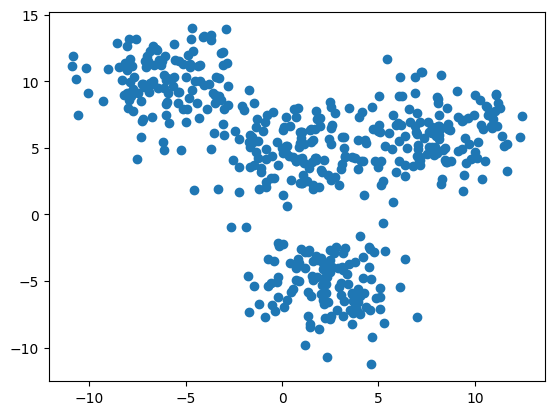

In [28]:
# generating dummy data of 500 records with 4 clusters
features, labels = make_blobs(n_samples=500, centers=4, cluster_std=2.00)

# plotting the dummy data
plt.scatter(features[:,0], features[:,1])

In [29]:
# performing kmeans clustering using KMeans class
km_model = KMeans(n_clusters=4)
km_model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [30]:
# printing centroid values
print(km_model.cluster_centers_)

[[ 0.64993693  4.85407623]
 [ 2.31286067 -5.23900285]
 [ 8.0907927   6.08056763]
 [-6.0493443  10.00597179]]


In [31]:
# printing predicted label values
print(km_model.labels_)

[1 0 3 2 3 2 2 3 0 2 3 3 1 3 2 1 3 3 3 0 3 0 0 0 1 2 0 2 1 2 1 2 0 1 1 1 3
 0 1 0 2 1 3 2 1 2 0 0 3 2 3 2 3 2 2 3 0 3 0 2 2 1 2 3 1 0 0 2 3 2 1 0 2 3
 2 3 1 0 1 1 0 3 2 0 3 3 2 3 1 2 1 0 0 3 3 0 3 1 1 2 2 3 3 3 2 0 3 0 2 3 0
 1 2 3 2 3 3 3 1 0 1 1 2 2 3 0 2 3 2 1 0 2 1 3 3 0 1 1 3 2 0 1 2 0 0 3 2 1
 1 3 2 0 2 0 1 1 3 2 1 0 3 2 1 0 0 2 1 2 2 3 2 0 1 3 0 1 1 3 3 2 0 3 3 2 0
 0 3 1 2 2 2 2 1 3 0 1 1 1 1 3 0 1 0 2 2 1 0 2 2 0 0 2 0 3 2 2 1 1 3 3 2 1
 0 0 2 1 1 2 1 2 2 3 0 0 2 0 0 1 2 1 3 1 1 3 2 1 2 0 1 3 1 3 3 2 3 3 0 3 1
 1 1 0 1 2 1 3 1 0 0 1 1 0 0 0 0 0 1 2 2 0 2 2 0 3 0 1 1 0 1 0 2 0 3 2 0 1
 2 2 1 1 2 3 2 2 2 3 0 1 2 3 3 3 2 0 2 0 2 0 2 3 0 3 2 2 3 0 0 2 0 0 3 0 1
 1 2 3 0 1 1 1 2 1 1 3 1 2 3 0 0 3 3 3 3 2 3 0 3 3 3 1 1 0 3 3 2 3 0 0 2 0
 0 3 1 3 1 1 0 3 3 3 1 2 3 2 2 3 0 1 2 1 1 2 3 2 1 3 0 3 0 1 0 3 2 0 3 3 2
 1 0 2 2 1 3 2 3 2 1 2 2 0 2 1 0 2 3 1 3 0 2 1 1 1 1 0 0 3 0 2 3 3 0 1 0 1
 1 1 2 0 0 1 2 2 2 0 2 2 1 2 0 2 0 1 3 0 3 1 1 2 0 0 0 1 0 0 0 1 3 1 3 3 1
 0 0 1 0 2 3 1 0 1 1 0 1 

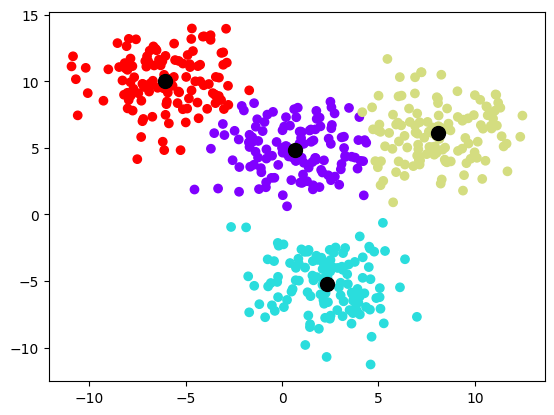

In [32]:
# print the data points
plt.scatter(features[:,0], features[:,1], c=km_model.labels_, cmap='rainbow')

# print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

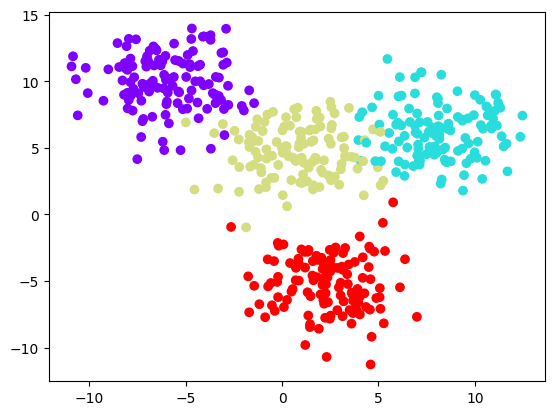

In [33]:
# print actual datapoints
plt.scatter(features[:,0], features[:,1], c=labels, cmap='rainbow')

In [34]:
import seaborn as sns

iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
# dividing data into features and labels
features = iris_df.drop(["species"], axis = 1)
labels = iris_df.filter(["species"], axis = 1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
# training KMeans model
km_model = KMeans(n_clusters=4)
km_model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [43]:
print(km_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 0 0 0 0 3 0 0 0 2
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 2
 0 2]


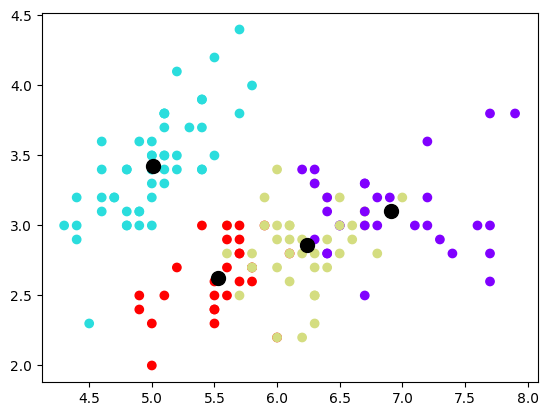

In [44]:
# print the data points
plt.scatter(features[:,0], features[:,1], c=km_model.labels_, cmap='rainbow')

# print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

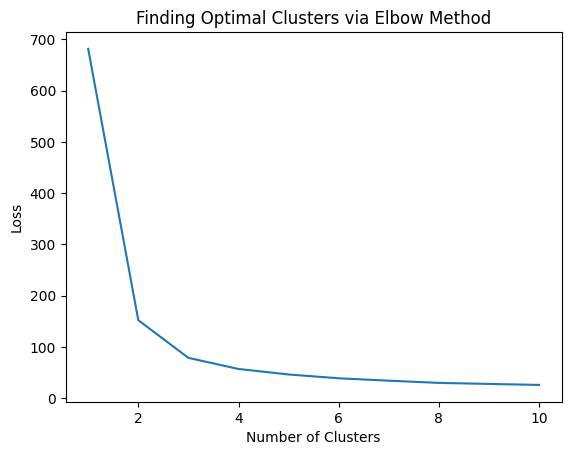

In [45]:
# training the KMeans on K values from 1 to 10
loss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(features)
    loss.append(km.inertia_)

# printing loss against number of clusters

import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss)
plt.title("Finding Optimal Clusters via Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Loss")
plt.show()

In [46]:
# training KMeans with 3 clusters
km_model = KMeans(n_clusters=3)
km_model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

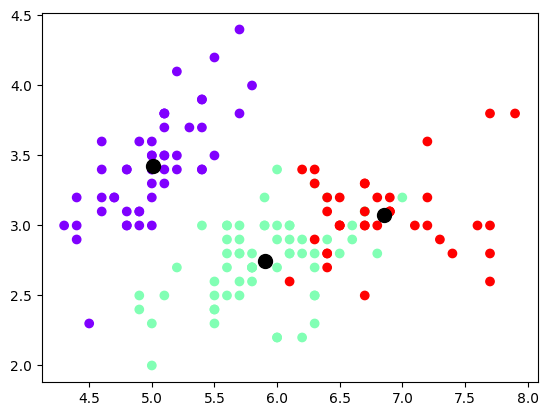

In [47]:
# print the data points with predicted labels
plt.scatter(features[:, 0], features[:, 1], c=km_model.labels_, cmap="rainbow")

# print the predicted centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c="black")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


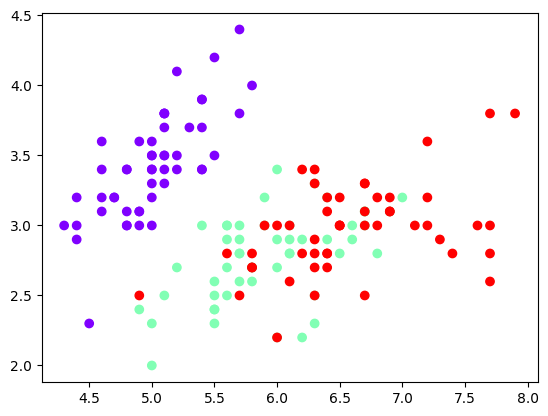

In [48]:
# converting categorical labels to numbers

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

# print the data points with original labels
plt.scatter(features[:,0], features[:,1], c=labels, cmap="rainbow")

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline

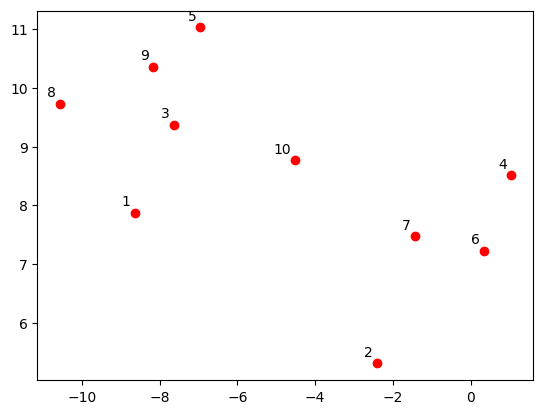

In [52]:
# generating dummy data of 10 records with 2 clusters
features, labels = make_blobs(n_samples=10, centers=2, cluster_std=2.00)

# plotting the dummy data
plt.scatter(features[:, 0], features[:, 1], color = 'r')

# adding numbers to data points
annots = range(1, 11)
for label, x, y in zip(annots, features[:, 0], features[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-3, 3),
        textcoords="offset points", ha="right", va="bottom")
plt.show()

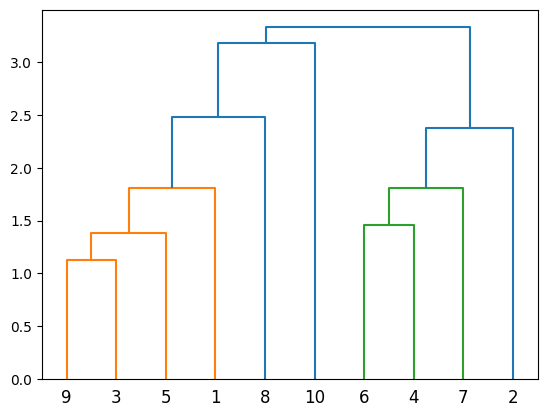

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendos = linkage(features, 'single')

annots = range(1, 11)

dendrogram(dendos,
           orientation = 'top',
           labels = annots,
           distance_sort = 'descending',
           show_leaf_counts = True)
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering

# training agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'ward')
hc_model.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

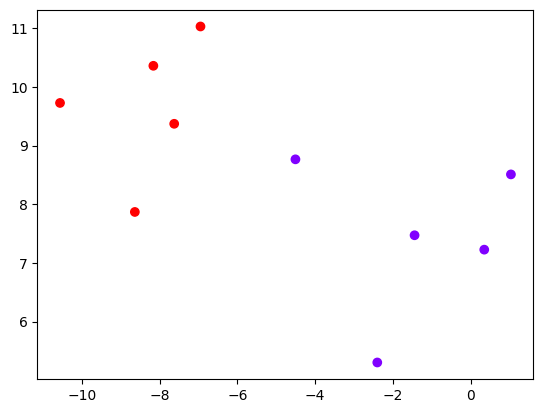

In [55]:
# print the data points
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

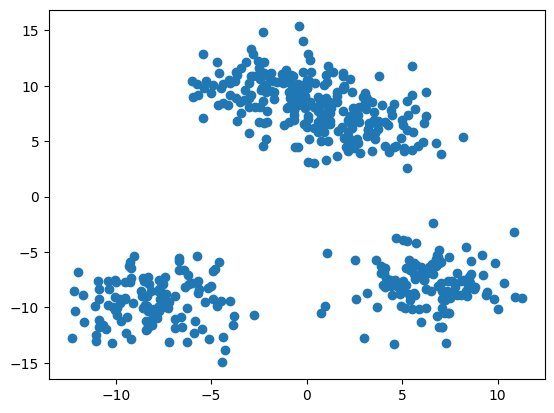

In [56]:
# generating dummy data of 500 records with 4 clusters
features, labels = make_blobs(n_samples=500, centers=4, cluster_std = 2.00)

# plotting the dummy data
plt.scatter(features[:, 0], features[:, 1])

In [58]:
# performing kmeans clustering using AgglomerativClustering class
hc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 3, 0, 3, 3, 1, 0, 3, 2, 2, 1, 0, 2, 2, 0, 3, 1, 1, 0, 1, 3,
       3, 1, 3, 0, 2, 0, 1, 1, 0, 3, 1, 0, 1, 2, 0, 1, 2, 3, 3, 1, 1, 3,
       1, 0, 2, 1, 0, 0, 2, 0, 0, 3, 3, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1,
       0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 2, 3, 0, 2, 0, 1, 2, 0, 3, 0, 3, 0,
       3, 0, 0, 2, 2, 0, 1, 2, 3, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 3, 2,
       2, 1, 3, 3, 0, 0, 0, 3, 2, 2, 1, 2, 2, 3, 0, 3, 3, 2, 3, 3, 0, 0,
       2, 2, 0, 1, 2, 1, 2, 3, 3, 0, 2, 3, 0, 0, 0, 3, 1, 3, 0, 2, 3, 1,
       0, 0, 2, 3, 3, 3, 2, 0, 3, 2, 2, 1, 0, 3, 3, 0, 0, 2, 1, 0, 1, 0,
       0, 2, 3, 1, 0, 0, 2, 3, 3, 1, 3, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0,
       0, 3, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 3, 3, 2, 1,
       1, 0, 2, 0, 0, 2, 3, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0,
       2, 0, 1, 1, 1, 0, 0, 3, 0, 1, 1, 1, 0, 3, 2, 1, 0, 1, 2, 2, 2, 3,
       0, 1, 2, 3, 1, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, 1, 2, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 3, 1, 0, 2, 1, 0, 2, 0, 1, 2,

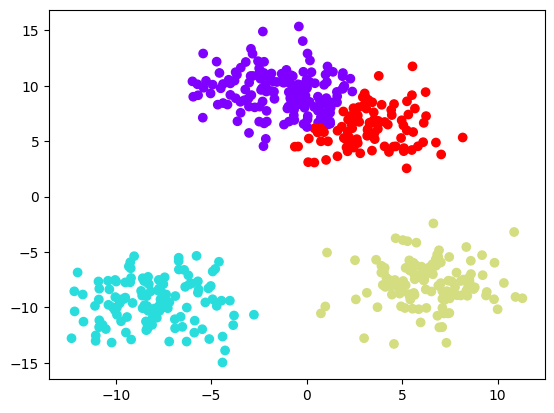

In [59]:
# print the data points
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

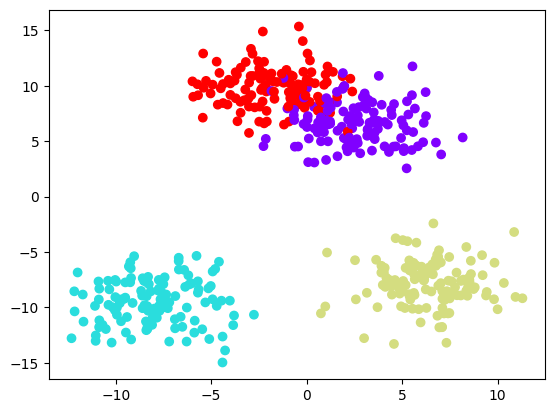

In [61]:
# print actual datapoints
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='rainbow')

In [62]:
import seaborn as sns

iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
# dividing data into features and labels
features = iris_df.drop(["species"], axis = 1)
labels = iris_df.filter(["species"], axis = 1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
# training Hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering

# training agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

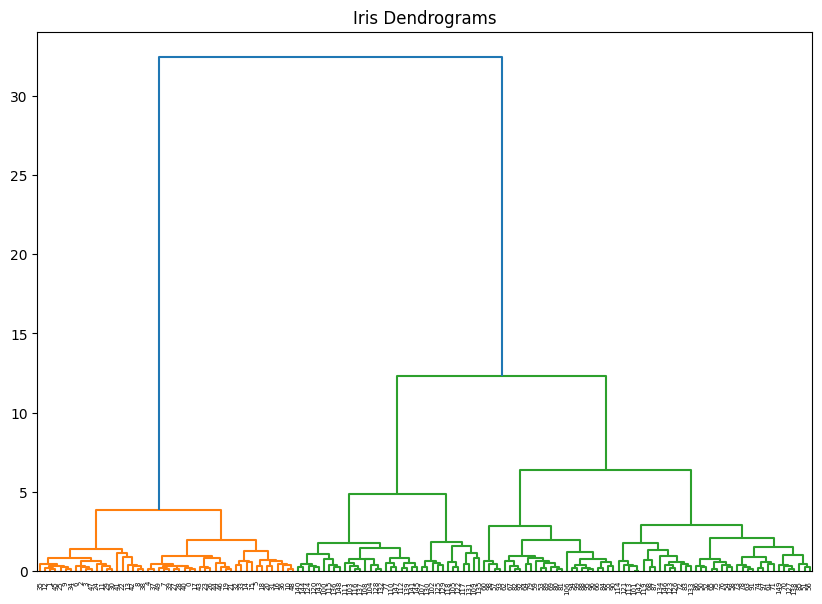

In [68]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Iris Dendrograms")
dend = shc.dendrogram(shc.linkage(features, method='ward'))